In [230]:
 def VGG16_net(*h_params):
   
   name="Model Name: VGG16"
   
   for pos_dict in h_params:
      base_model=VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
      model=Sequential([
          base_model,
        Flatten(),
        Dense(1000, activation='relu'),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dense(units=NUM_CATEGORIES, activation='softmax')
      ])
      for layer in base_model.layers:
          layer.trainable = False
          
      current_params = hyp_set[pos_dict]
      compile_train_evaluate(model, current_params,name)

In [235]:
# main
models_to_run = [-100]

hyp_set = [{"epochs": 10, "loss": 'categorical_crossentropy', "optimizer": RMSprop(learning_rate=0.001, decay=1e-6), "batch_size": 256, "validation_split": 0.3},
           {"epochs": 10, "loss": 'categorical_crossentropy', "optimizer": SGD(learning_rate=0.001, momentum=0.9), "batch_size": 64, "validation_split": 0.3},
           {"epochs": 15, "loss": 'categorical_crossentropy', "optimizer": "RMSprop", "batch_size": 256, "validation_split": 0.3},
           {"epochs": 20, "loss": 'categorical_crossentropy', "optimizer": "adam", "batch_size": 256, "validation_split": 0.3},
           {"epochs": 30, "loss": 'categorical_crossentropy', "optimizer": "adam", "batch_size": 256, "validation_split": 0.3}]

metrics = [F1Score(num_classes=NUM_CATEGORIES, threshold=0.5), 'accuracy', 'Precision', 'Recall']

Caricamento immagini dal dataset...

Model Name: VGG16
Data Augmentation: False
Iperparametri: {'epochs': 10, 'loss': 'categorical_crossentropy', 'optimizer': <keras.optimizer_v2.gradient_descent.SGD object at 0x000002A01F1A1AC0>, 'batch_size': 64, 'validation_split': 0.3}
Parametri addestrabili: 2318307
Parametri non addestrabili: 14716688
Parametri totali: 17034995

Epoch 1/10
858/858 [==============================] - 502s 584ms/step - loss: 1.3870 - f1_score: 0.3834 - accuracy: 0.6092 - precision: 0.9053 - recall: 0.3805 - val_loss: 0.9257 - val_f1_score: 0.5659 - val_accuracy: 0.7241 - val_precision: 0.8965 - val_recall: 0.5441
Epoch 2/10
858/858 [==============================] - 506s 590ms/step - loss: 0.7182 - f1_score: 0.7052 - accuracy: 0.7964 - precision: 0.9320 - recall: 0.6533 - val_loss: 0.6667 - val_f1_score: 0.7324 - val_accuracy: 0.7955 - val_precision: 0.9169 - val_recall: 0.6848
Epoch 3/10
858/858 [==============================] - 512s 597ms/step - loss: 0.5102 - f1

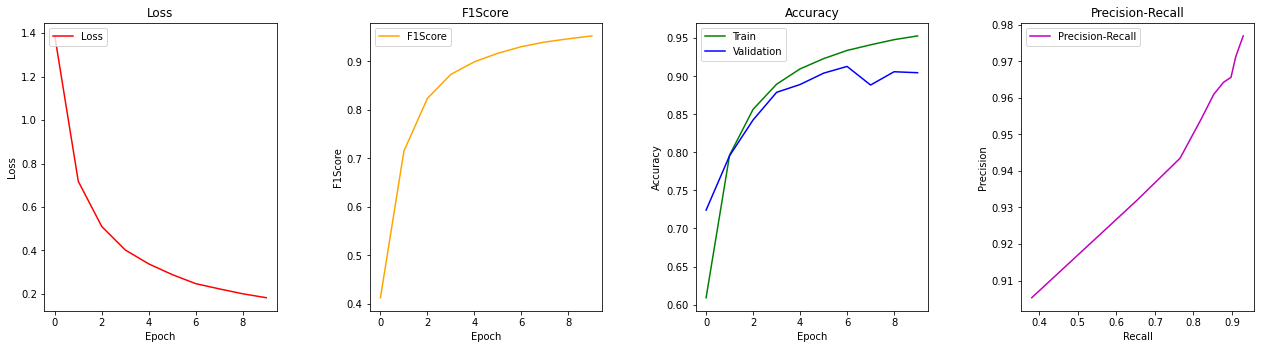

In [236]:
for m in models_to_run:
  if m<0:
    aug=False
    m*=-1
  else:
    aug=True

  if m==1: 
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(30,30,aug)
    my_network(0)
    print(3*'\n')
  elif m==2: 
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(30,30,aug)
    my_network_deeper(0)
    print(3*'\n')
  elif m==100:
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(75,75,aug)
    VGG16_net(1)
    print(3*'\n')
  elif m==200:
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(32,32,aug)
    VGG19_net(0)
    print(3*'\n')
  elif m==300:
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(32,32,aug)
    ResNet50V2_net(0)
    print(3*'\n')
  elif m==400:
    images, labels, x_train, x_test, y_train, y_test, input_shape = init_data(75,75,aug)
    InceptionV3_net(0)
    print(3*'\n')